In [ ]:
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [ ]:
# Reading the csv file and putting it into 'df' object
df = pd.read_csv('./grid_dataset.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head()

,Row,Column,Political_Rating,Economy_Rating,Environment_Rating,Facilities_Rating,Fit
0,0,0,0.063,0.129,0.513,0.063,0
1,0,1,0.129,0.513,0.261,0.513,1
2,0,2,0.063,0.129,0.129,0.129,0
3,0,3,0.063,0.513,0.129,0.034,0
4,0,4,0.261,0.261,0.034,0.513,0


In [ ]:
# Putting feature variable to X
X=df.drop(['Row','Column', 'Fit'], axis =1)
# Putting response variable to y
Y = df['Fit']

In [ ]:
X.head()

,Political_Rating,Economy_Rating,Environment_Rating,Facilities_Rating
0,0.063,0.129,0.513,0.063
1,0.129,0.513,0.261,0.513
2,0.063,0.129,0.129,0.129
3,0.063,0.513,0.129,0.034
4,0.261,0.261,0.034,0.513


In [ ]:
Y.head()

0    0
1    1
2    0
3    0
4    0
Name: Fit, dtype: int64

In [ ]:
# now lets split the data into train and test
from sklearn.model_selection import train_test_split

In [ ]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((630, 4), (270, 4))

In [ ]:
#import RandomForestClassifier and fit the data.
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,n_estimators=100, oob_score=True)

In [ ]:
%%time
classifier_rf.fit(X_train, y_train)

CPU times: user 257 ms, sys: 34.9 ms, total: 292 ms
Wall time: 295 ms


RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [ ]:
# checking the oob score
accuracy = classifier_rf.oob_score_*100
print("%.2f" % accuracy,"%")

97.94 %


In [ ]:
#hyperparameter tuning
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [9],
    'min_samples_leaf': [1],
    'n_estimators': [70,80,90,100]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [ ]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 4 candidates, totalling 16 fits
CPU times: user 372 ms, sys: 46.1 ms, total: 419 ms
Wall time: 5.98 s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [9], 'min_samples_leaf': [1],
                         'n_estimators': [70, 80, 90, 100]},
             scoring='accuracy', verbose=1)

In [ ]:
accuracy = grid_search.best_score_*100
print("%.2f" % accuracy,"%")

98.26 %


In [ ]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=9, n_estimators=90, n_jobs=-1, random_state=42)

In [ ]:
grid_search.best_params_

{'max_depth': 9, 'min_samples_leaf': 1, 'n_estimators': 90}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=9,min_samples_leaf=1, n_estimators=90, oob_score=True)

In [ ]:
%%time
classifier_rf.fit(X_train, y_train)

CPU times: user 289 ms, sys: 6.46 ms, total: 295 ms
Wall time: 472 ms


RandomForestClassifier(max_depth=9, n_estimators=90, n_jobs=-1, oob_score=True,
                       random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred_test = classifier_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_test)*100
print("%.2f" % accuracy,"%")

99.63 %


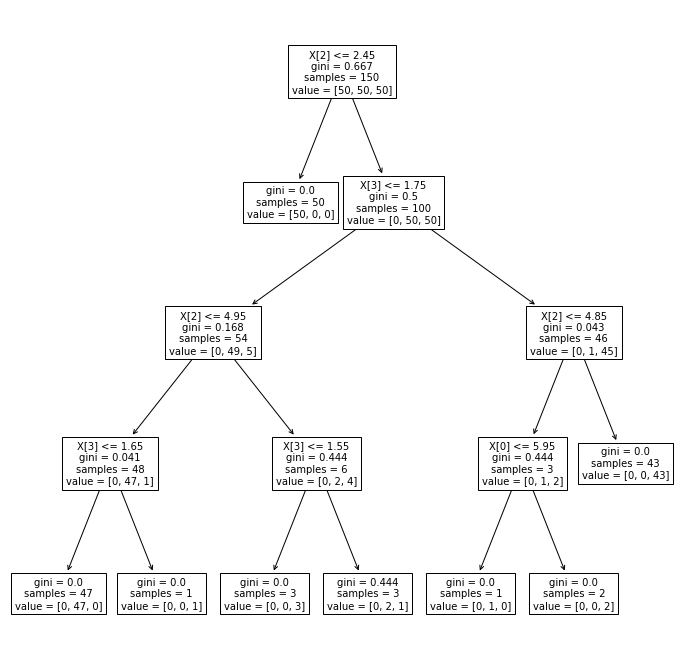

In [ ]:
#visualization
from sklearn import tree
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# load data
X, Y = load_iris(return_X_y=True)

# create and train model
clf = tree.DecisionTreeClassifier(max_depth=4)  # set hyperparameter
clf.fit(X, Y)

# plot tree
plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
tree.plot_tree(clf, fontsize=10)
plt.show()

In [ ]:
#finding feature importance
rf_best.feature_importances_

array([0.37262808, 0.19225679, 0.23188843, 0.20322669])

In [ ]:
imp_df = pd.DataFrame({
    "Feature name": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [ ]:
imp_df.sort_values(by="Imp", ascending=False)

,Feature name,Imp
0,Political_Rating,0.372628
2,Environment_Rating,0.231888
3,Facilities_Rating,0.203227
1,Economy_Rating,0.192257


In [ ]:
classifier_rf.oob_score_*100

99.04761904761905

In [ ]:
y_pred_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1])

In [ ]:
X_optimal_path = df.drop(['Political_Rating', 'Economy_Rating', 'Environment_Rating', 'Facilities_Rating', 'Fit'], axis=1)
X=df.drop(['Row','Column', 'Fit'], axis =1)
y_prediction = classifier_rf.predict(X)

In [ ]:
y_prediction

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
import random
mine_1_row = random.randint(0,29)
mine_1_column = random.randint(0,29)

mine_2_row = random.randint(0,29)
mine_2_column = random.randint(0,29)

mine_3_row = random.randint(0,29)
mine_3_column = random.randint(0,29)

In [ ]:
X_optimal_path['Fit']=y_prediction
X_optimal_path['Total_Distance']=0
X_optimal_path=df.drop(df[df.Fit==0].index)
X_optimal_path = X_optimal_path.drop(['Political_Rating', 'Economy_Rating', 'Environment_Rating', 'Facilities_Rating'], axis=1)
X_optimal_path

,Row,Column,Fit
1,0,1,1
13,0,13,1
17,0,17,1
20,0,20,1
22,0,22,1
...,...,...,...
864,28,24,1
866,28,26,1
883,29,13,1
888,29,18,1


In [ ]:
from warnings import warn
import heapq

class Node:
    """
    A node class for A* Pathfinding
    """

    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position

        self.g = 0
        self.h = 0
        self.f = 0

    def __eq__(self, other):
        return self.position == other.position
    
    def __repr__(self):
      return f"{self.position} - g: {self.g} h: {self.h} f: {self.f}"

    # defining less than for purposes of heap queue
    def __lt__(self, other):
      return self.f < other.f
    
    # defining greater than for purposes of heap queue
    def __gt__(self, other):
      return self.f > other.f

def return_path(current_node):
    path = []
    current = current_node
    while current is not None:
        path.append(current.position)
        current = current.parent
    return path[::-1]  # Return reversed path


def astar(maze, start, end, allow_diagonal_movement = False):
    """
    Returns a list of tuples as a path from the given start to the given end in the given maze
    :param maze:
    :param start:
    :param end:
    :return:
    """

    # Create start and end node
    start_node = Node(None, start)
    start_node.g = start_node.h = start_node.f = 0
    end_node = Node(None, end)
    end_node.g = end_node.h = end_node.f = 0

    # Initialize both open and closed list
    open_list = []
    closed_list = []

    # Heapify the open_list and Add the start node
    heapq.heapify(open_list) 
    heapq.heappush(open_list, start_node)

    # Adding a stop condition
    outer_iterations = 0
    max_iterations = (len(maze[0]) * len(maze) // 2)

    # what squares do we search
    adjacent_squares = ((0, -1), (0, 1), (-1, 0), (1, 0),)
    if allow_diagonal_movement:
        adjacent_squares = ((0, -1), (0, 1), (-1, 0), (1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1),)

    # Loop until you find the end
    while len(open_list) > 0:
        outer_iterations += 1

        if outer_iterations > max_iterations:
          # if we hit this point return the path such as it is
          # it will not contain the destination
          warn("giving up on pathfinding too many iterations")
          return return_path(current_node)       
        
        # Get the current node
        current_node = heapq.heappop(open_list)
        closed_list.append(current_node)

        # Found the goal
        if current_node == end_node:
            return return_path(current_node)

        # Generate children
        children = []
        
        for new_position in adjacent_squares: # Adjacent squares

            # Get node position
            node_position = (current_node.position[0] + new_position[0], current_node.position[1] + new_position[1])

            # Make sure within range
            if node_position[0] > (len(maze) - 1) or node_position[0] < 0 or node_position[1] > (len(maze[len(maze)-1]) -1) or node_position[1] < 0:
                continue

            # Make sure walkable terrain
            if maze[node_position[0]][node_position[1]] != 0:
                continue

            # Create new node
            new_node = Node(current_node, node_position)

            # Append
            children.append(new_node)

        # Loop through children
        for child in children:
            # Child is on the closed list
            if len([closed_child for closed_child in closed_list if closed_child == child]) > 0:
                continue

            # Create the f, g, and h values
            child.g = current_node.g + 1
            child.h = ((child.position[0] - end_node.position[0]) ** 2) + ((child.position[1] - end_node.position[1]) ** 2)
            child.f = child.g + child.h

            # Child is already in the open list
            if len([open_node for open_node in open_list if child.position == open_node.position and child.g > open_node.g]) > 0:
                continue

            # Add the child to the open list
            heapq.heappush(open_list, child)

    warn("Couldn't get a path to destination")
    return None

def example(print_maze = True):

    maze = [[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,],]
    
    total_distance=0
    #X_optimal_path = X_optimal_path.reset_index()  # make sure indexes pair with number of rows
    for index, row in X_optimal_path.iterrows():
      start=(row['Row'], row['Column'])

      end = (mine_1_row, mine_1_column)
      path = astar(maze, start, end)
      total_distance+=len(path)

      end = (mine_2_row, mine_2_column)
      path = astar(maze, start, end)
      total_distance+=len(path)

      end = (mine_3_row, mine_3_column)
      path = astar(maze, start, end)
      total_distance+=len(path)

      X_optimal_path.loc[index, 'Total_Distance']=total_distance
      total_distance=0
      



    start = (0, 0)
    end = (len(maze)-1, len(maze[0])-1)

    path = astar(maze, start, end)

    if print_maze:
      for step in path:
        maze[step[0]][step[1]] = 2
      
      for row in maze:
        line = []
        for col in row:
          if col == 1:
            line.append("\u2588")
          elif col == 0:
            line.append(" ")
          elif col == 2:
            line.append(".")
        print("".join(line))

    print(path)


example()

..                            
 ..                           
  ..                          
   ..                         
    ..                        
     ..                       
      ..                      
       ..                     
        ..                    
         ..                   
          ..                  
           ..                 
            ..                
             ..               
              ..              
               ..             
                ..            
                 ..           
                  ..          
                   ..         
                    ..        
                     ..       
                      ..      
                       ..     
                        ..    
                         ..   
                          ..  
                           .. 
                            ..
                             .
[(0, 0), (0, 1), (1, 1), (1, 2), (2, 2), (2, 3), (3, 3), (3, 4), (4, 4

In [ ]:
print (df.iloc[X_optimal_path['Total_Distance'].idxmin(),0:2])

Row       9.0
Column    9.0
Name: 279, dtype: float64
